## Homework following intro to python lesson 3
### In lesson three, we covered:
* lesson 2 review
* concatenating dataframes
* built-in datasets
    * sklearn/url/seaborn
* quickly inspecting data
* manipulating/sorting dataframes (unique values, sum/min/max, subsetting, sorting)
* summary statistics
* grouping data
* exporting/reading in data
* intro to plotting (matplotlib/histogram/scatterplots)
***

### Q. 1: import pandas and load the mtcars dataset from the following url:

https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv

#### data dictionary for the motor trends car dataset:
https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html

In [2]:
import pandas as pd
cars_df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')

### Q. 2: Familiarize yourself with the data; what are our features? how many observations do we have? what does the dataframe look like?

In [8]:
cars_df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [127]:
print('number of features:', len(cars_df.columns))
print('features:', list(cars_df.columns))
print('number of observations (models):', len(cars_df))
print('unique models:', list(cars_df.model.unique()))

number of features: 14
features: ['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb', 'mpg_zeroed', 'mpg_zeroed_scaled']
number of observations (models): 32
unique models: ['Mazda RX4', 'Mazda RX4 Wag', 'Datsun 710', 'Hornet 4 Drive', 'Hornet Sportabout', 'Valiant', 'Duster 360', 'Merc 240D', 'Merc 230', 'Merc 280', 'Merc 280C', 'Merc 450SE', 'Merc 450SL', 'Merc 450SLC', 'Cadillac Fleetwood', 'Lincoln Continental', 'Chrysler Imperial', 'Fiat 128', 'Honda Civic', 'Toyota Corolla', 'Toyota Corona', 'Dodge Challenger', 'AMC Javelin', 'Camaro Z28', 'Pontiac Firebird', 'Fiat X1-9', 'Porsche 914-2', 'Lotus Europa', 'Ford Pantera L', 'Ferrari Dino', 'Maserati Bora', 'Volvo 142E']


### Q. 3: How many unique values for 'gear' do we have in the dataset? Print a list of them.

In [130]:
print('number of levels for gear:',len(cars_df.gear.unique()))
print('gears w/in dataset:', list(cars_df.gear.unique()))

number of levels for gear: 3
gears w/in dataset: [4, 3, 5]


### Q. 4: Print out the data for the top 25% of cars that have the best (highest) MPG:

In [9]:
cars_df.sort_values('mpg', ascending=False).head(int(len(cars_df)*0.25))

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
26,Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


### Q. 5: What is the mean mpg for this top 25%? How about the bottom 25%?

In [10]:
top_25_mean_mpg = cars_df.sort_values('mpg', ascending=False).head(int(len(cars_df)*0.25)).mpg.mean()
bottom_25_mean_mpg = cars_df.sort_values('mpg').head(int(len(cars_df)*0.25)).mpg.mean()
print('top 25% mean mpg:', round(top_25_mean_mpg, 2))
print('bottom 25% mean mpg:', round(bottom_25_mean_mpg, 2))

top 25% mean mpg: 28.45
bottom 25% mean mpg: 13.56


### Q. 6: What is the total displacement for all manual cars w/ at least 5 gears?:

In [15]:
# iris_df[(iris_df['petal_length'] > 5.5) & (iris_df['petal_width'] > 2.2)]
total_disp = sum(cars_df[(cars_df.am == 1) & (cars_df.gear >= 5)].disp)
#total_disp = sum(cars_df[(cars_df.am == 1) | (cars_df.am == 0)].disp)
print('total displacement:',total_disp)

total displacement: 1012.4


### Q. 7: Take a look at the descriptive statistics for the cars dataset:

In [100]:
cars_df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


### Q. 8: Let's look at the data based on some grouping criteria; what does the mean data look like for manual vs. automatic transmission? how about by number of cylinders?

In [102]:
cars_df.groupby(by='am').mean()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,gear,carb
am,,,,,,,,,,
0,17.147368,6.947368,290.378947,160.263158,3.286316,3.768895,18.183158,0.368421,3.210526,2.736842
1,24.392308,5.076923,143.530769,126.846154,4.050000,2.411000,17.360000,0.538462,4.384615,2.923077


In [104]:
cars_df.groupby(by='cyl').mean()

,mpg,disp,hp,drat,wt,qsec,vs,am,gear,carb
cyl,,,,,,,,,,
4,26.663636,105.136364,82.636364,4.070909,2.285727,19.137273,0.909091,0.727273,4.090909,1.545455
6,19.742857,183.314286,122.285714,3.585714,3.117143,17.977143,0.571429,0.428571,3.857143,3.428571
8,15.100000,353.100000,209.214286,3.229286,3.999214,16.772143,0.000000,0.142857,3.285714,3.500000


### Q. 9: We want to look at mpg centered and scaled (i.e. put the numeric data on a common scale). Add a new column, 'mpg_zeroed_scaled', which represents the mpg for each vehicle minus the mean mgp and divided by the standard deviation:

#### note: standard deviation can be calculated using std()

In [17]:
cars_df['mpg_zeroed_scaled'] = (cars_df['mpg']-cars_df.mpg.mean())/cars_df.mpg.std()
cars_df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpg_zeroed_scaled
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,0.150885
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,0.150885
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,0.449543
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,0.217253
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,-0.230735


### Q. 10: Export this updated cars dataframe to a .csv file so it can be read back into python:

In [112]:
file_name = 'cars_df_mpg_scaled.csv'

cars_df.to_csv(file_name)

### Q. 11: Generate a histogram of mpg:

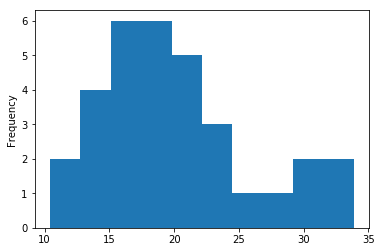

In [117]:
%matplotlib inline 

cars_df.mpg.plot.hist()

### Q. 12: What features do you think correlate with mpg? Explore some of them with scatterplots:

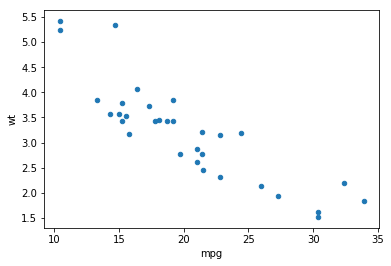

In [123]:
cars_df.plot.scatter(x='mpg', y='wt')

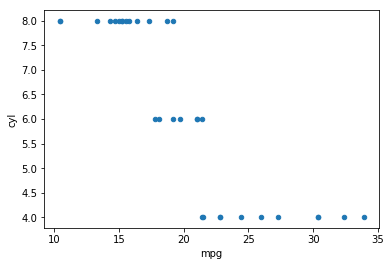

In [124]:
cars_df.plot.scatter(x='mpg', y='cyl')